# 2장 - 간단한 분류 알고리즘 훈련

### 목차

- 인공 뉴런: 초기 머신 러닝의 간단한 역사
    - 인공 뉴런의 수학적 정의
    - 퍼셉트론 학습 규칙
- 파이썬으로 퍼셉트론 학습 알고리즘 구현
    - 객체 지향 퍼셉트론 API
    - 붓꽃 데이터셋에서 퍼셉트론 훈련
- 적응형 선형 뉴런과 학습의 수렴
    - 경사 하강법으로 비용 함수 최소화
    - 파이썬으로 아달린 구현
    - 특성 스케일을 조정하여 경사 하강법 결과 향상
    - 대규모 머신 러닝과 확률적 경사 하강법

In [ ]:
from IPython.display import Image

# 2.1 인공 뉴런: 초기 머신 러닝의 간단한 역사

In [ ]:
Image(url='https://git.io/JtIbf', width=500)

- 1943년 워렌 맥컬록(Warren McCulloch)과 월터 피츠(Walter Pitts)가 맥컬록-피츠(MCP) 뉴런 발표
- 프랑크 로젠블라트(Frank Rosenblatt)는 MCP 뉴런 모델을 기반으로 퍼셉트론 학습 개념을 발표

## 2.1.1 인공 뉴런의 수학적 정의

$\boldsymbol{w}=\begin{bmatrix} w_1 \\ \vdots \\ w_m\end{bmatrix}$ ,
$\boldsymbol{x}=\begin{bmatrix} x_1 \\ \vdots \\ x_m\end{bmatrix}$

최종 입력(net input) : $z = w_1x_1+w_2x_2+\cdots+w_mx_m$


벡터 점곱(dot product), 행렬 곱셈(matrix multiplication) :
$\begin{bmatrix}1&2&3\end{bmatrix}\times\begin{bmatrix}4\\5\\6\end{bmatrix}=1\times4+2\times5+3\times6=32$

점곱을 사용한 표현 : $z = w_1x_1+\cdots+w_mx_m=\sum_{j=1}^mx_jw_j=\boldsymbol{w}^T\boldsymbol{x}$

퍼셉트론의 결정 함수 : $\phi(z)=\begin{cases}1&z\ge\theta\mbox{ 일 때} \\ -1&\mbox{그 외}\end{cases}$
$\;\;\;\;\;$
$\phi(z)=\begin{cases}1&z-\theta\ge0\mbox{ 일 때} \\ -1&\mbox{그 외}\end{cases}$

$w_0=-\theta , x_0=1$ 일 때 : $z_{new} = w_0x_0+w_1x_1+\cdots+w_mx_m=\sum_{j=0}^mx_jw_j=\boldsymbol{w}^T\boldsymbol{x}$

In [ ]:
# 퍼셉트론 결정 함수(단위 계단 함수)와 결정 경계
Image(url='https://git.io/JtIbL', width=500)

## 2.1.2 퍼셉트론 학습 규칙

$\Delta w_j = \eta(y^{(i)}-\hat{y}^{(i)})x_j^{(i)}$

$w_j := w_j + \Delta w_j$

클래스 레이블을 정확히 예측한 경우 :

$y^{(i)}=-1,\; \hat{y}^{(i)}=-1, \qquad \Delta w_j=\eta(-1-(-1))x_j^{(i)}=0$

$y^{(i)}=1,\; \hat{y}^{(i)}=1, \qquad \Delta w_j=\eta(1-1)x_j^{(i)}=0$

클래스 레이블을 잘못 예측한 경우 :

$y^{(i)}=1,\;\hat{y}^{(i)}=-1, \qquad \Delta w_j=\eta(1-(-1))x_j^{(i)}=\eta(2)x_j^{(i)}$

$y^{(i)}=-1,\;\hat{y}^{(i)}=1, \qquad \Delta w_j=\eta(-1-1)x_j^{(i)}=\eta(-2)x_j^{(i)}$

예를 들어 $\hat{y}^{(i)}=-1,\;y^{(i)}=+1,\;\eta=1$ 이고, $x_j^{(i)}=0.5$ 일 때 :

$\Delta w_j=(1-(-1))0.5=(2)0.5=1$

$x_j^{(i)}=2$ 일 때 :

$\Delta w_j=(1-(-1))2=(2)2=4$

In [ ]:
Image(url='https://git.io/JtIbq', width=600)

In [ ]:
# 퍼셉트론 알고리즘
Image(url='https://git.io/JtIbO', width=600)

# 2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현

## 2.2.1 객체 지향 퍼셉트론 API

In [ ]:
import numpy as np


class Perceptron(object):
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

$\boldsymbol{w}^{(1)} = \boldsymbol{w}^{(0)}+\mathit\Delta\boldsymbol{w}=\boldsymbol{w}^{(0)}+\eta(\boldsymbol{y}-\boldsymbol{\hat{y}})\boldsymbol{x}=\eta(\boldsymbol{y}-\phi(\boldsymbol{w}^{(0)}\boldsymbol{x}))\boldsymbol{x}=\eta(\boldsymbol{y}+1)\boldsymbol{x}$

$a\cdot b =\vert a\vert\vert b\vert\text{cos}\theta$

$\theta=\text{cos}^{-1}\dfrac{a\cdot b}{\vert a\vert\vert b\vert}$

In [ ]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

## 2.2.2 붓꽃 데이터셋에서 퍼셉트론 훈련

### 붓꽃 데이터셋 읽기

In [ ]:
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path =  '/content/drive/MyDrive/머신러닝 교과서 with 파이썬/iris.csv'
df = pd.read_csv(file_path)

In [ ]:
df.tail()

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


In [ ]:
del df['caseno']

In [ ]:
df.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 붓꽃 데이터 그래프 그리기

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

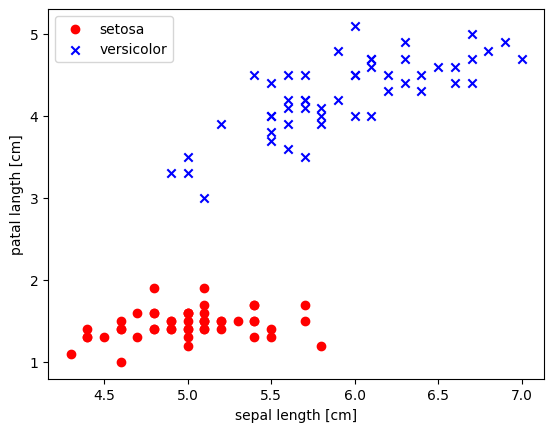

In [ ]:
# setosa와 versicolor를 선택합니다
y = df.iloc[:100, 4].values
y = np.where( y == 'setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다
X = df.iloc[0:100, [0,2]].values

# 산점도를 그립니다, setosa-음성, versicolor-양성
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('patal langth [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### 퍼셉트론 모델 훈련하기

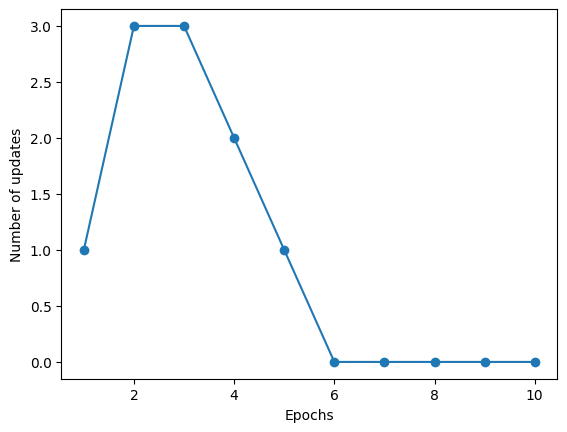

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### 결정 경계 그래프 함수

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 꽃받침 길이 최소/최대
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # 꽃잎 길이 최소/최대
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor=None if idx==1 else 'black')

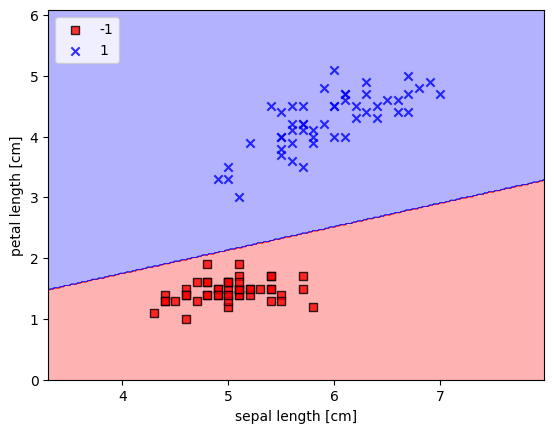

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

# 2.3 적응형 선형 뉴런과 학습의 수렴

In [ ]:
Image(url='https://git.io/JtIbn', width=600)

아달린의 활성화 함수 : $\phi(z) = z$

## 2.3.1 경사 하강법으로 비용 함수 최소화

목적 함수 == 비용 함수 == 손실 함수

$J(\boldsymbol{w})=\dfrac{1}{2}\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)^2$

In [ ]:
Image(url='https://git.io/JtIbc', width=500)

$\
\begin{align*}
\dfrac{\partial J}{\partial w_j}\
&=\dfrac{\partial}{\partial w_j}\dfrac{1}{2}\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)^2 \\
&=\dfrac{1}{2}\dfrac{\partial}{\partial w_j}\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)^2 \\
&=\dfrac{1}{2}\sum_i2\left(y^{(i)}-\phi(z^{(i)})\right)\dfrac{\partial}{\partial w_j}\left(y^{(i)}-\phi(z^{(i)})\right) \\
&=\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)\dfrac{\partial}{\partial w_j}\left(y^{(i)}-\sum(w_kx_k^{(i)})\right) \\
&=\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)\left(-x_j^{(i)}\right) \\
&=-\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)x_j^{(i)} \\
\end{align*}
$

$\mathit\Delta w_j=-\eta\dfrac{\partial J}{\partial w_j}=\eta\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)x_j^{(i)}$

$\boldsymbol{w} := \boldsymbol{w} + \mathit\Delta \boldsymbol{w}$

## 2.3.2 파이썬으로 아달린 구현하기

In [ ]:
class AdalineGD(object):
    """적응형 선형 뉴런 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # 이 코드의 활성화 함수는 항등 함수(identity function)이기 때문에
            # 아무런 효과가 없습니다.
            # 이 대신 `output = self.net_input(X)`로 바로 쓸 수 있습니다.
            # 이 활성화 함수는 개념적인 목적을 위해 만들었습니다.
            # (잠시 후에 보게 될) 로지스틱 회귀의 경우 이 함수를 시그모이드 함수로
            # 바꾸어 로지스틱 회귀 분류기를 구현합니다.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

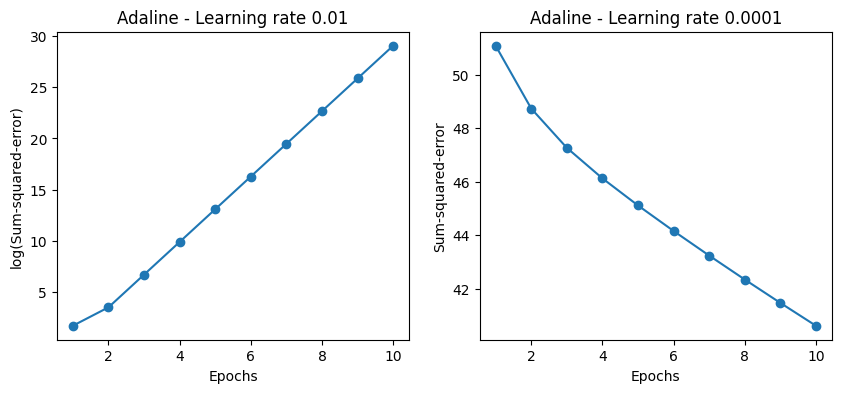

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [ ]:
Image(url='https://git.io/JtIb4', width=700)

## 2.3.3 특성 스케일을 조정하여 경사 하강법 결과 향상시키기

표준화(standardization) : $\boldsymbol{x}'_j=\dfrac{\boldsymbol{x}_j-\mu_j}{\sigma_j}$

In [ ]:
Image(url='https://git.io/JtIbB', width=700)

In [ ]:
# 특성을 표준화합니다.
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

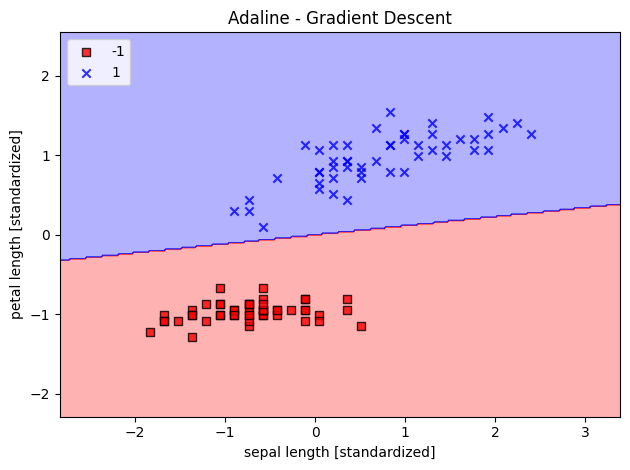

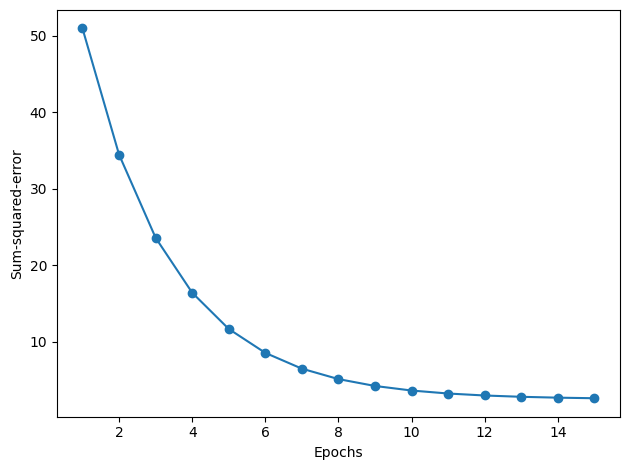

In [ ]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

## 2.3.4 대규모 머신 러닝과 확률적 경사 하강법

배치 경사 하강법 : $\mathit\Delta \boldsymbol{w}=\eta\sum_i\left(y^{(i)}-\phi(z^{(i)})\right)\boldsymbol{x}^{(i)}$

확률적 경사 하강법 : $\mathit\Delta \boldsymbol{w}=\eta\left(y^{(i)}-\phi(z^{(i)})\right)\boldsymbol{x}^{(i)}$

In [ ]:
class AdalineSGD(object):
    """ADAptive LInear NEuron 분류기

    Parameters
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    shuffle : bool (default: True)
      True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞습니다
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    Attributes
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 벡터

        반환값
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """훈련 데이터를 섞습니다"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화합니다"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

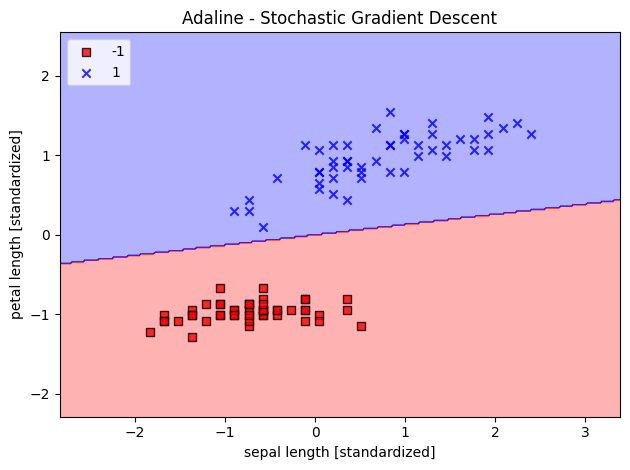

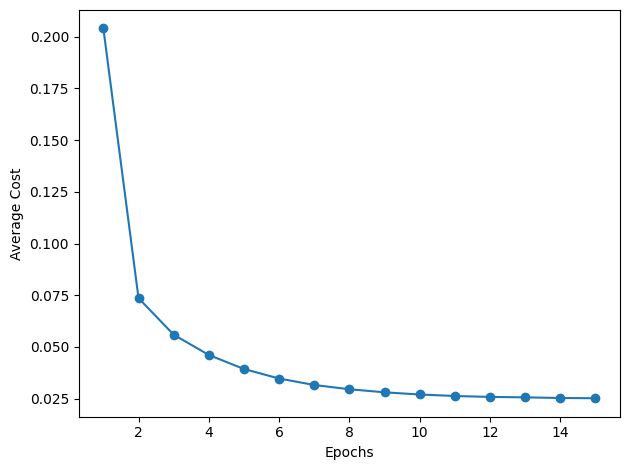

In [ ]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [ ]:
ada_sgd.partial_fit(X_std[0, :], y[0])